## A. Create a data frame called DataFrame1. It should contain data about five employees. Each employee data consists of employee number, name, salary, department number and designation. Add appropriate column names to the columns. Find the mean of the salary in the DataFrame1.

In [ ]:
import pandas as pd

data = {
    'Employee Number': [1, 2, 3, 4, 5],
    'Name': ['John', 'Alice', 'Mike', 'Emily', 'David'],
    'Salary': [5000, 6000, 4500, 7000, 5500],
    'Department Number': [101, 102, 101, 103, 102],
    'Designation': ['Manager', 'Engineer', 'Analyst', 'Director', 'Developer']
}

DataFrame1 = pd.DataFrame(data)
DataFrame1

,Employee Number,Name,Salary,Department Number,Designation
0,1,John,5000,101,Manager
1,2,Alice,6000,102,Engineer
2,3,Mike,4500,101,Analyst
3,4,Emily,7000,103,Director
4,5,David,5500,102,Developer


In [ ]:
salary_mean = DataFrame1['Salary'].mean()
salary_mean

5600.0

## B. Implement the Decision Tree algorithm on Diabetes dataset. Compare the results of using Gini Index and Entropy criterion for min_samples_split values of 20 and 30. Draw a color coded decision tree. Finally, demonstrate the prediction method using a new instance (The output should be the presence of diabetes ‘Yes’ or ‘No’).

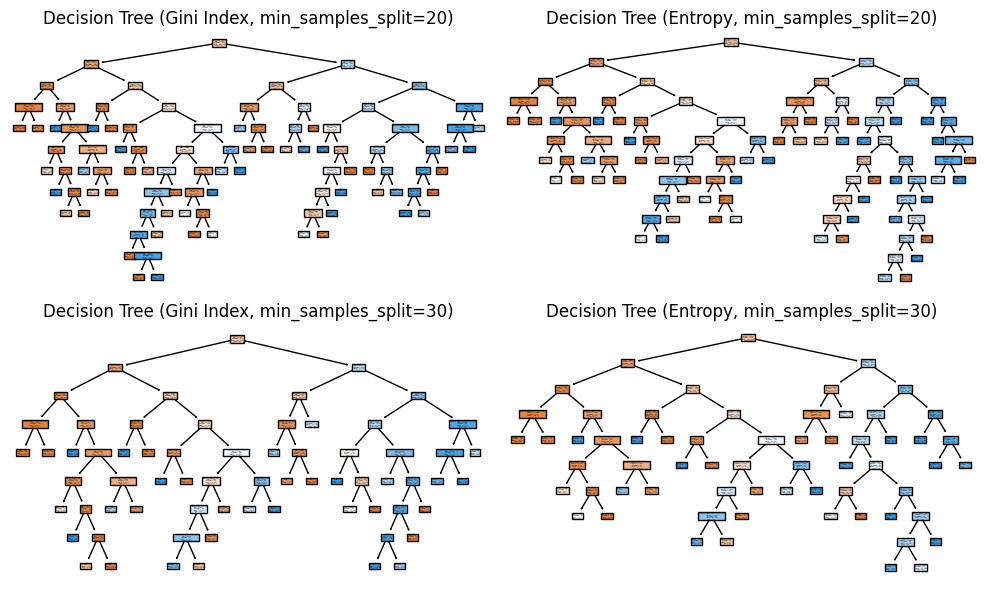

Prediction: No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the Diabetes dataset
diabetes = pd.read_csv('diabetes.csv')

# Split the dataset into features (X) and target (y)
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree models with different min_samples_split values
model_gini_20 = DecisionTreeClassifier(criterion='gini', min_samples_split=20)
model_entropy_20 = DecisionTreeClassifier(criterion='entropy', min_samples_split=20)
model_gini_30 = DecisionTreeClassifier(criterion='gini', min_samples_split=30)
model_entropy_30 = DecisionTreeClassifier(criterion='entropy', min_samples_split=30)

# Fit the models to the training data
model_gini_20.fit(X_train, y_train)
model_entropy_20.fit(X_train, y_train)
model_gini_30.fit(X_train, y_train)
model_entropy_30.fit(X_train, y_train)

# Evaluate the models
y_pred_gini_20 = model_gini_20.predict(X_test)
y_pred_entropy_20 = model_entropy_20.predict(X_test)
y_pred_gini_30 = model_gini_30.predict(X_test)
y_pred_entropy_30 = model_entropy_30.predict(X_test)

accuracy_gini_20 = metrics.accuracy_score(y_test, y_pred_gini_20)
accuracy_entropy_20 = metrics.accuracy_score(y_test, y_pred_entropy_20)
accuracy_gini_30 = metrics.accuracy_score(y_test, y_pred_gini_30)
accuracy_entropy_30 = metrics.accuracy_score(y_test, y_pred_entropy_30)

# Draw the color-coded decision trees
plt.figure(figsize=(10, 6))

plt.subplot(221)
plot_tree(model_gini_20, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (Gini Index, min_samples_split=20)")

plt.subplot(222)
plot_tree(model_entropy_20, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (Entropy, min_samples_split=20)")

plt.subplot(223)
plot_tree(model_gini_30, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (Gini Index, min_samples_split=30)")

plt.subplot(224)
plot_tree(model_entropy_30, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (Entropy, min_samples_split=30)")

plt.tight_layout()
plt.show()

# Demonstrate prediction using a new instance
new_instance = [[1, 90, 62, 12, 43, 27.2, 0.58, 35]]
prediction = model_gini_20.predict(new_instance)

if prediction[0] == 0:
    print("Prediction: No")
else:
    print("Prediction: Yes")